In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [23]:
# Load data from the JSON file
json_file_path = "wget/results_Shubham.json"  # Update with your actual file path
graph_path = "Airtel_graph/" # Update with your actual graph folder
operator = "Airtel" # Update with your actual operator name
with open(json_file_path, "r") as json_file:
    data = json.load(json_file)

In [24]:
df = pd.DataFrame(data)

# Columns to convert to float
float_columns = ['min_v4', 'max_v4', 'avg_v4', 'sum_v4', 'std_dev_v4',
                 'min_v6', 'max_v6', 'avg_v6', 'sum_v6', 'std_dev_v6']

# Convert to float and coerce errors to NaN
df[float_columns] = df[float_columns].apply(pd.to_numeric, errors='coerce')

# Remove rows where any of the numeric values are NaN
df_clean = df.dropna(subset=float_columns, how='any')

# Print the cleaned DataFrame
df_clean

,website,date,name,operator,ipv4,country_v4,city_v4,min_v4,max_v4,avg_v4,sum_v4,std_dev_v4,ipv6,country_v6,city_v6,min_v6,max_v6,avg_v6,sum_v6,std_dev_v6
3,www.iitd.ac.in,02 December 23,Shubham,Airtel,103.27.9.24,India,New Delhi,0.6,2.4,1.333330,4.0,7.717220e-01,2001:df4:e000:29::212,India,New Delhi,0.7,1.8,1.166670,3.5,0.464280
11,www.facebook.com,02 December 23,Shubham,Airtel,157.240.239.35,India,Noida,1.6,1.6,1.600000,4.8,2.220450e-16,2a03:2880:f144:181:face:b00c:0:25de,India,Noida,1.3,1.9,1.600000,4.8,0.244949
12,www.yahoo.com,02 December 23,Shubham,Airtel,98.137.11.163,United States,Quincy,10.0,14.0,12.000000,36.0,1.632990e+00,2001:4998:124:1507::f000,United States,Lockport,14.0,18.0,15.333300,46.0,1.885620
15,blogspot.com,02 December 23,Shubham,Airtel,142.250.194.41,India,New Delhi,6.7,7.1,6.900000,20.7,1.632990e-01,2404:6800:4002:81f::2009,Australia,Sydney,6.7,7.6,7.100000,21.3,0.374166
16,office.com,02 December 23,Shubham,Airtel,13.107.6.156,United States,Emigrant Gap,0.7,1.3,0.966667,2.9,2.494440e-01,2620:1ec:a92::156,United States,Ashburn,0.8,1.1,0.966667,2.9,0.124722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,plurk.com,26 November 23,Shubham,Airtel,104.16.2.31,Canada,Toronto,1.7,4.0,3.100000,9.3,1.003330e+00,2606:4700:9642:3856:f164:47f:6810:21f,France,Paris,2.0,2.2,2.100000,6.3,0.081650
912,google.cl,26 November 23,Shubham,Airtel,142.250.192.131,India,Mumbai,1.6,2.3,1.966670,5.9,2.867440e-01,2404:6800:4002:814::2003,Australia,Sydney,1.3,2.5,1.766670,5.3,0.524934
913,mit.edu,26 November 23,Shubham,Airtel,23.47.252.248,India,Chennai,0.6,0.8,0.700000,2.1,8.164970e-02,2600:141b:5000:59c::255e,United States,New York,1.7,3.9,2.833330,8.5,0.899383
914,google.ro,26 November 23,Shubham,Airtel,142.250.194.67,India,New Delhi,1.2,2.0,1.566670,4.7,3.299830e-01,2404:6800:4002:82d::2003,Australia,Sydney,1.2,1.8,1.566670,4.7,0.262467


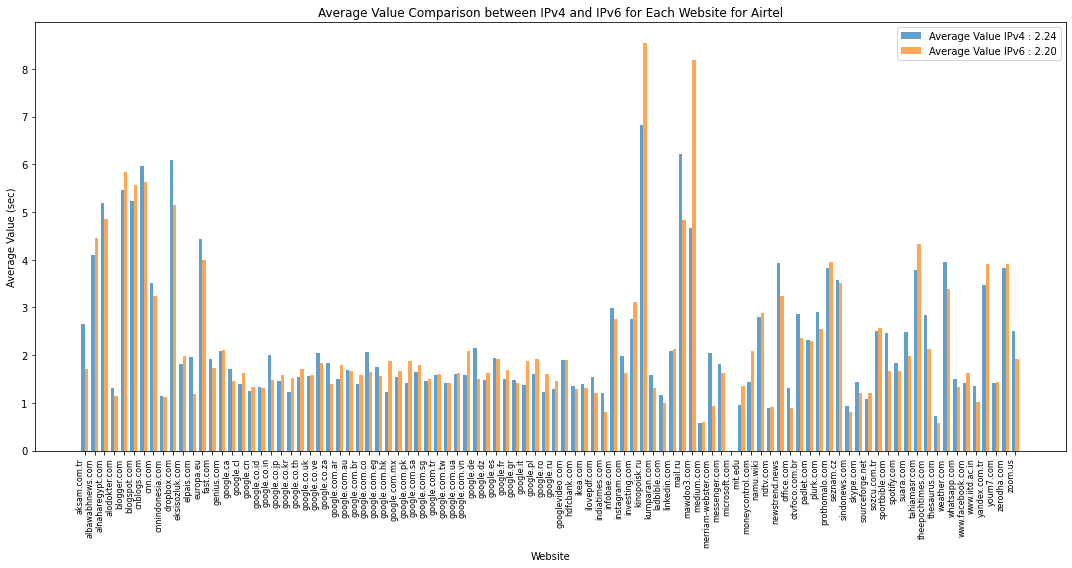

In [25]:
#We are removing some website data as they took unusually long and hence made the graphs not understandable due to sheer difference in values
# Group data by the "website" column
grouped_data = df_clean.groupby('website')

# Lists to store average values for each website
avg_v4_values_by_website = []
avg_v6_values_by_website = []
websites = []

# Perform analysis for each group
for website, group in grouped_data:
    if website == 'cnnic.cn' or website == 'www.yahoo.com'or website == 'www.nationalgrid.com'  :
        continue

    # Calculate average values for 'avg_v4' and 'avg_v6'
    avg_v4 = group['avg_v4'].astype(float).mean()
    avg_v6 = group['avg_v6'].astype(float).mean()

    # Append average values to the lists
    avg_v4_values_by_website.append(avg_v4)
    avg_v6_values_by_website.append(avg_v6)
    websites.append(website)
    
avg_v4_value = sum(avg_v4_values_by_website )/len(avg_v4_values_by_website )
avg_v6_value = sum(avg_v6_values_by_website )/len(avg_v4_values_by_website )
    
# Plotting average values for each website
plt.figure(figsize=(15, 8))
bar_width = 0.35
index = range(len(websites))

plt.bar(index, avg_v4_values_by_website, width=bar_width, label=f'Average Value IPv4 : {avg_v4_value:.2f}', alpha=0.7)
plt.bar([i + bar_width for i in index], avg_v6_values_by_website, width=bar_width, label=f'Average Value IPv6 : {avg_v6_value:.2f}', alpha=0.7)

plt.title(f'Average Value Comparison between IPv4 and IPv6 for Each Website for {operator}')
plt.xlabel('Website')
plt.ylabel('Average Value (sec)')
plt.legend()
plt.xticks([i + bar_width / 2 for i in index], websites, rotation=90, ha='right', fontsize=8)  # Adjust the rotation angle and font size as needed
plt.tight_layout()  # Ensures proper spacing
plt.savefig(f'{graph_path}wget_website_comparison.png', dpi=600)  # Adjust file name and dpi as needed
plt.show()


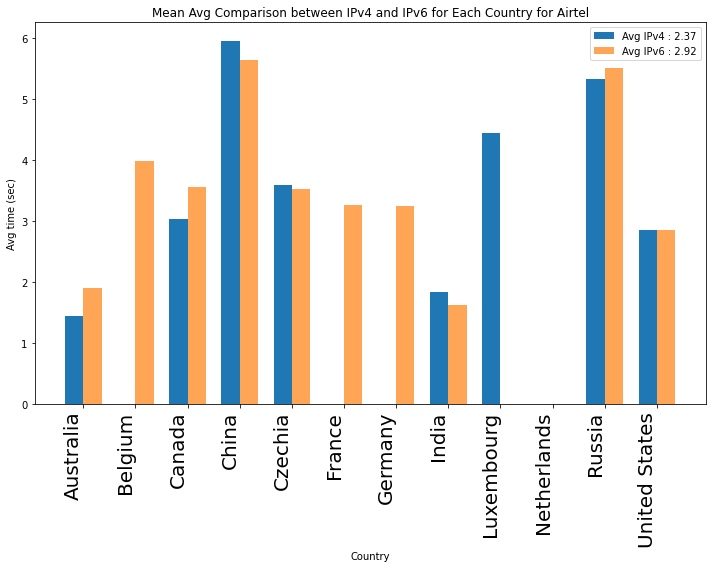

In [26]:
# Assuming df is your original DataFrame

# Filter out rows with 'cnnic.cn' in the website name
df_filtered = df_clean[df_clean['website'] != 'cnnic.cn']

# Group data by the "country_v4" column
grouped_data_v4 = df_filtered.groupby('country_v4')

# Group data by the "country_v6" column
grouped_data_v6 = df_filtered.groupby('country_v6')

# Dictionaries to store mean avg values for each country
mean_avg_v4_by_country = {}
mean_avg_v6_by_country = {}

# Calculate mean avg values for IPv4
for country, country_group in grouped_data_v4:
    mean_avg_v4_by_country[country] = country_group['avg_v4'].astype(float).mean()

# Calculate mean avg values for IPv6
for country, country_group in grouped_data_v6:
    mean_avg_v6_by_country[country] = country_group['avg_v6'].astype(float).mean()

# Get all unique countries from both IPv4 and IPv6
all_countries = sorted(set(mean_avg_v4_by_country.keys()) | set(mean_avg_v6_by_country.keys()))

# Lists to store mean avg values for each country
mean_avg_v4_values = [mean_avg_v4_by_country.get(country, 0) for country in all_countries]
mean_avg_v6_values = [mean_avg_v6_by_country.get(country, 0) for country in all_countries]
countries = list(all_countries)

# Set the width of the bars
bar_width = 0.35

# Set the positions of bars on X-axis
r1 = np.arange(len(countries))
r2 = [x + bar_width for x in r1]

final_avg_v4 = sum(mean_avg_v4_values)/len(mean_avg_v4_values)
final_avg_v6 = sum(mean_avg_v6_values)/len(mean_avg_v6_values)

# Plotting mean avg values for each country as side-by-side bar graphs
plt.figure(figsize=(10, 8))
plt.bar(r1, mean_avg_v4_values, width=bar_width, label=f'Avg IPv4 : {final_avg_v4:.2f}')
plt.bar(r2, mean_avg_v6_values, width=bar_width, label=f'Avg IPv6 : {final_avg_v6:.2f}', alpha=0.7)
plt.title(f'Mean Avg Comparison between IPv4 and IPv6 for Each Country for {operator}')
plt.xlabel('Country')
plt.ylabel('Avg time (sec)')
plt.legend()
plt.xticks([r + bar_width/2 for r in range(len(countries))], countries, rotation=90, ha='right', fontsize=20)
plt.tight_layout()  # Ensures proper spacing
plt.savefig(f'{graph_path}wget_countries_comparison.png', dpi=300)  # Adjust file name and dpi as needed
plt.show()
